In [1]:
import pandas as pd
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
from subnetwork_generator import SubnetworkGenerator

In [2]:
sg = SubnetworkGenerator()

In [3]:
sg.load_genes_list()
sg.list_of_genes

['USP24',
 'ERICH3',
 'KIF26B',
 'USP34',
 'ANTXR1',
 'SCN9A',
 'FN1',
 'SPHKAP',
 'HRH1',
 'LRRC2',
 'EPHB1',
 'PIK3CA',
 'MCCC1',
 'ATP13A5',
 'UGT8',
 'DAB2',
 'AP3B1',
 'CAMK4',
 'CTNNA1',
 'TBC1D9B',
 'SDK1',
 'GUSB',
 'AKAP9',
 'MGAM',
 'CSMD1',
 'SLC20A2',
 'AOPEP',
 'ZFP37',
 'EHMT1',
 'PIPSL',
 'UBQLN3',
 'TSG101',
 'UEVLD',
 'PACSIN3',
 'SERPING1',
 'ALG8',
 'MTNR1B',
 'ZNF384',
 'DIP2B',
 'ZNF10',
 'ATP7B',
 'SPTB',
 'RIN3',
 'C15orf48',
 'MAPK6',
 'ADAMTS17',
 'PKD1',
 'PRSS8',
 'CDH3',
 'CNTROB',
 'USP43',
 'MAP2K4',
 'ATAD5',
 'NBR1',
 'CTC-260F20.3',
 'SHANK1',
 'VSIG10L',
 'KIR3DL3',
 'SULF2',
 'DIP2A',
 'RPGR',
 'SLC35A2',
 'CSMD2',
 'RRAGC',
 'MACF1',
 'ACOT11',
 'DOCK7',
 'LRRC7',
 'RTCA',
 'AHCYL1',
 'S100A5',
 'CACNA1E',
 'BRINP3',
 'USH2A',
 'RYR2',
 'SMYD3',
 'BIRC6',
 'PPM1B',
 'RGPD3',
 'CCDC93',
 'CACNB4',
 'CD302',
 'ITGA4',
 'DOCK10',
 'MLPH',
 'SETD5',
 'KLHL6',
 'MASP1',
 'MED28',
 'FRAS1',
 'GZMA',
 'ANKRD55',
 'TAF9',
 'ATP10B',
 'PROP1',
 'HIVEP1',
 'AL

In [4]:
len(sg.list_of_genes)

18603

In [5]:
first900 = sg.list_of_genes[:900]
interactions = sg.get_interactions(first900)

KeyboardInterrupt: 

Why create a greedy heuristic algorithm when a super-fast greedy heuristic algo already exists? That's right: the Louvain algorithm seems to be the fastest known algo for graph clustering. The metric isn't density but is modularity - which is fairly good too. And it is meant to achieve the same thing I'm aiming for.

In [8]:
node_names, adjacency = sg.get_graph(interactions)
node_labels = sg.get_clusters(adjacency)
len(node_names),len(node_labels)

Unique cluster labels with counts:  {0: 96, 1: 90, 2: 89, 3: 80, 4: 78, 5: 58, 6: 57, 7: 43, 8: 39, 9: 29, 10: 28, 11: 15, 12: 13, 13: 7, 14: 6, 15: 5, 16: 4, 17: 3, 18: 3, 19: 3, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2}
Modularity: 0.5588517842031127


(764, 764)

## Visualisation

In [9]:
clustering_dict = sg.get_clustering_dict(node_labels,node_names)

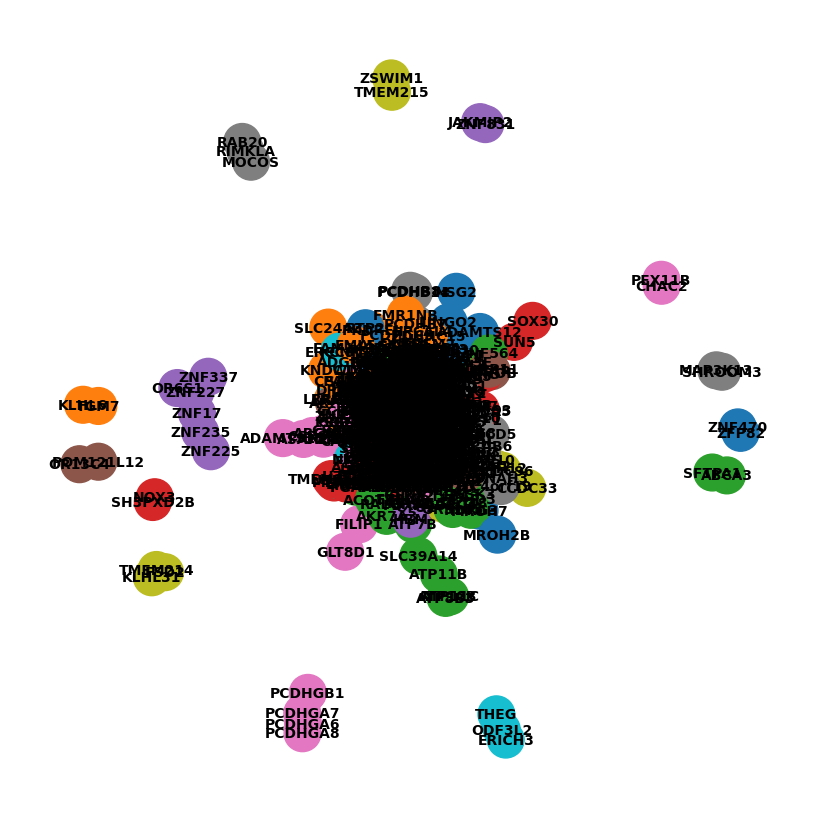

In [10]:
sg.draw_graph(clustering_dict,interactions)

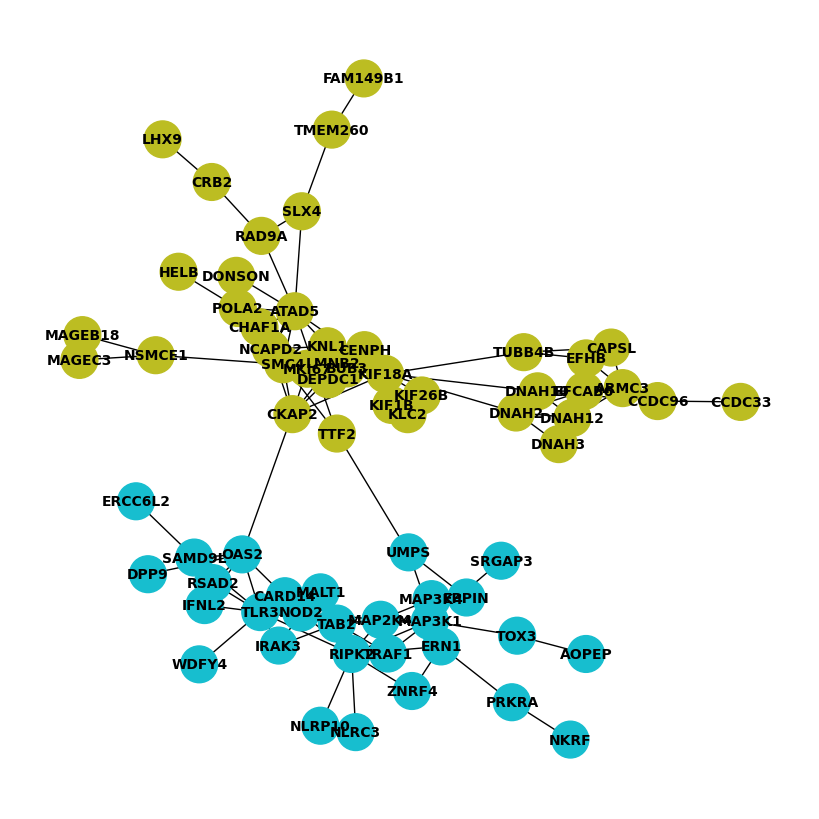

In [11]:
sg.draw_graph(clustering_dict,interactions,clustering_dict[9]+clustering_dict[8])

### Greedy Iterative Clustering

In [4]:
sg.greedy_iterative_clustering()

Unique cluster labels with counts:  {0: 96, 1: 90, 2: 89, 3: 80, 4: 78, 5: 58, 6: 57, 7: 43, 8: 39, 9: 29, 10: 28, 11: 15, 12: 13, 13: 7, 14: 6, 15: 5, 16: 4, 17: 3, 18: 3, 19: 3, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2}
Modularity: 0.5588517842031127
Cluster_IDs:  [ 2  2  6  7 22  2  2  2  2  2  0  4 10 10  6  1  2 11  0  0  1  1  4  4
  4 10  1  2  2  2  2  1  3  1  7  4 13  9  3 13  1  2  0  6  6  6  6  4
  8  5  0  6  5  5  4  8  4  2  2  2  1  2  2  2  0  4  4  6  2  3  3  6
  0  5  4  8  2  2  7  7  0  6  0  1  1  1  1  7  3  1  6  6  8  9  1  4
  8  3  1  6  3  8  0  0 15  0  1  6  6  6  4  4  8  7  6 26  8  1 10  4
  4  1  8  3  0  3  7  1  1  3  0  0  0  0  2  0  0  5  8  1  6  7  0  7
  5  7  4  6  2  5  0  0  2  2  2  2  2  3  6  4  6  1  3 12  8 10  2  2
  5  4  5  2  2 13  0  1 11  8  8  8  8  3  6  7  6  6  8  9  0  5  3  2
  2  8  8  4  4  5  2  1  6  0  3  9  3  0  9 19  9  3 10  7  8  2 10  7
  5  2  3 11  5  5 10  0  0  0  6  6  6  0  6  6  1  0 